# Financial Risk Analysis

### Exploratory data analysis

In [24]:
# We start by importing the libraries we will work with

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('mako')

In [25]:
# Next step is reading our dataset and gaining some understanding of it

df = pd.read_csv('fin_risk.csv')
df.head(10)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
5,30,Non-binary,PhD,Divorced,NaN,717.0,15613.0,Business,Unemployed,5,Fair,0.295984,NaN,4.0,Brianland,TN,Iceland,3.0,1,Medium
6,31,Non-binary,Master's,Widowed,45280.0,672.0,6553.0,Personal,Self-employed,1,Good,0.378890,NaN,NaN,West Lindaview,MD,Bouvet Island (Bouvetoya),0.0,1,Low
7,18,Male,Bachelor's,Widowed,93678.0,NaN,NaN,Business,Unemployed,10,Poor,0.396636,246597.0,1.0,Melissahaven,MA,Honduras,1.0,1,Low
8,32,Non-binary,Bachelor's,Widowed,20205.0,710.0,NaN,Auto,Unemployed,4,Fair,0.335965,227599.0,0.0,North Beverly,DC,Pitcairn Islands,4.0,2,Low
9,55,Male,Bachelor's,Married,32190.0,600.0,29918.0,Personal,Self-employed,5,Excellent,0.484333,130507.0,4.0,Davidstad,VT,Thailand,NaN,2,Low


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

As we can see above, there are some columns containing null values. There are essentially two ways to approach missing values. We can either drop them from our dataset or replace them with calculated values.

Which way to go depends on what's the purpose. If we want to do just EDA we could deal with the missing values immediatly. But as we want to implement ML, we will take care of the missing values later on.

I'll let the commented out code here though!

In [27]:
# We fill the null values with the mean

# for i in df.columns[df.isnull().any(axis=0)]:
#     df[i].fillna(df[i].mean(),inplace=True)

In [28]:
# We confirm that the null values have been replaced (so we don't have any null values anymore)

# df.isnull().sum()

In [29]:
# df.head(10)

Let's take a look at our data from a more visual approach

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

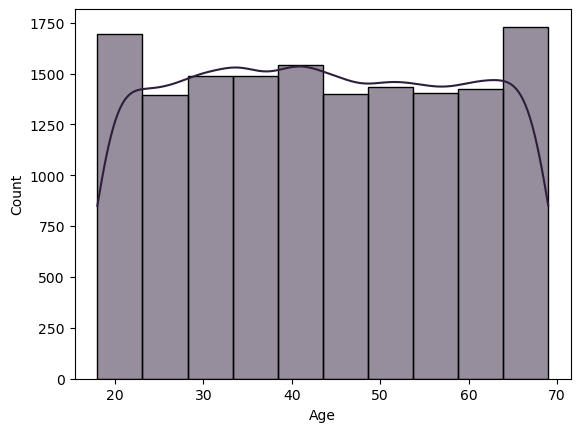

In [30]:
# Age distribution

sns.histplot(df['Age'], bins=10, kde=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Income', ylabel='Count'>

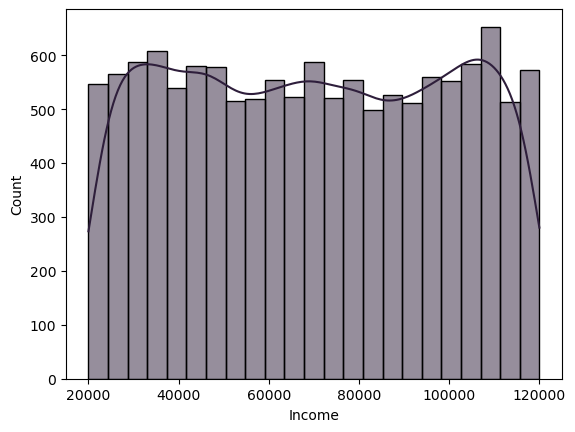

In [31]:
# Income distribution

sns.histplot(df['Income'], kde= True)

<Axes: xlabel='Education Level', ylabel='count'>

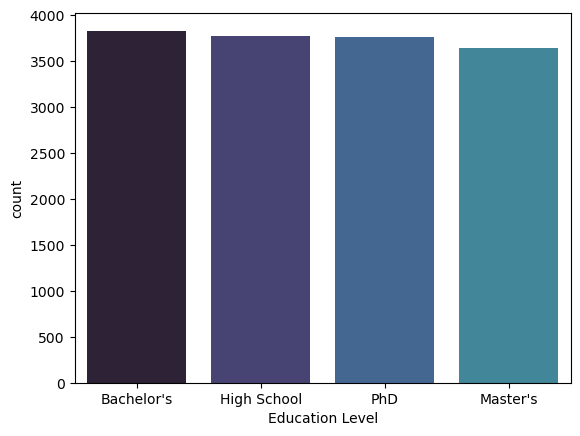

In [32]:
# Education level distribution

sns.countplot(df, x='Education Level', order=df['Education Level'].value_counts().index)

<Axes: xlabel='Marital Status', ylabel='count'>

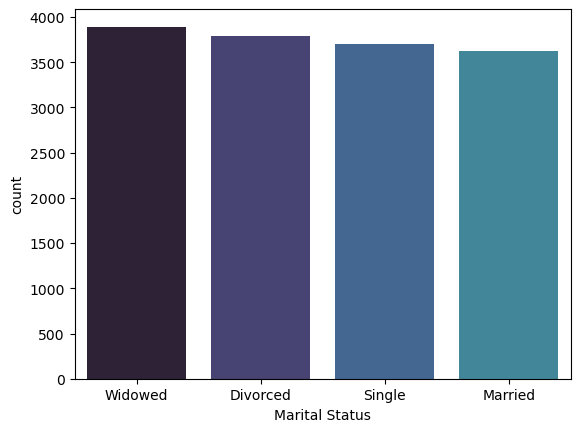

In [33]:
# Marital Status distribution

sns.countplot(df, x='Marital Status', order=df['Marital Status'].value_counts().index)

<Axes: xlabel='Risk Rating', ylabel='count'>

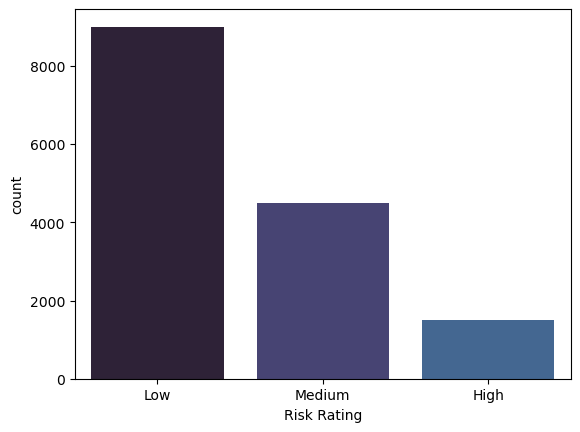

In [34]:
# Risk Rating distribution

sns.countplot(df, x='Risk Rating', order=df['Risk Rating'].value_counts().index)

Now let's see if there's correlations between the numeric features of our dataset:

<Axes: >

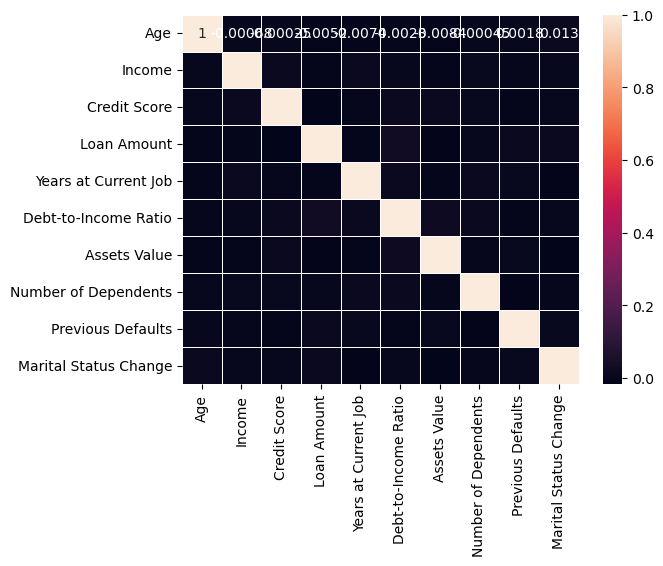

In [35]:
# Numeric Features correlation

correlation_matrix = df.select_dtypes(['float64','int64']).corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)

Surprisingly, it seems like there's essentially no correlation between our numeric features. 

Let's move on to putting some of the features in relation to one another: 

<Axes: xlabel='Employment Status', ylabel='Debt-to-Income Ratio'>

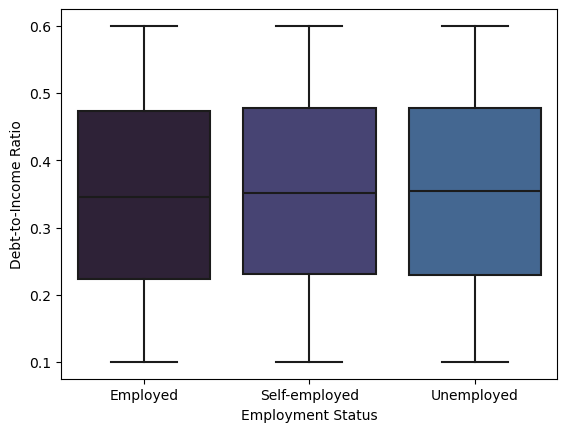

In [36]:
# Employment Status to Debt-to-Income Ratio relation

sns.boxplot(df, x='Employment Status', y='Debt-to-Income Ratio', order=df['Employment Status'].value_counts().index)

<Axes: xlabel='Loan Purpose', ylabel='count'>

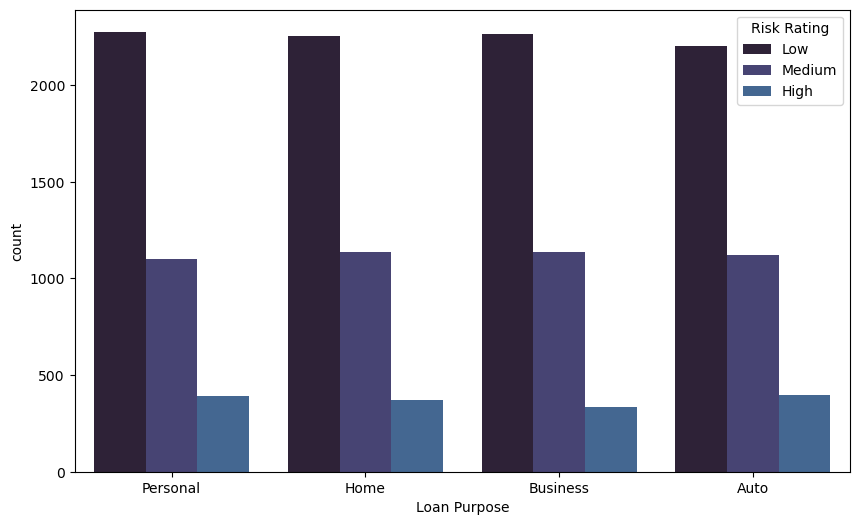

In [37]:
# Loan Purpose to Risk Rating relation

plt.figure(figsize=(10, 6))
sns.countplot(df, x='Loan Purpose', hue='Risk Rating', order=df['Loan Purpose'].value_counts().index)

<Axes: xlabel='Number of Dependents', ylabel='count'>

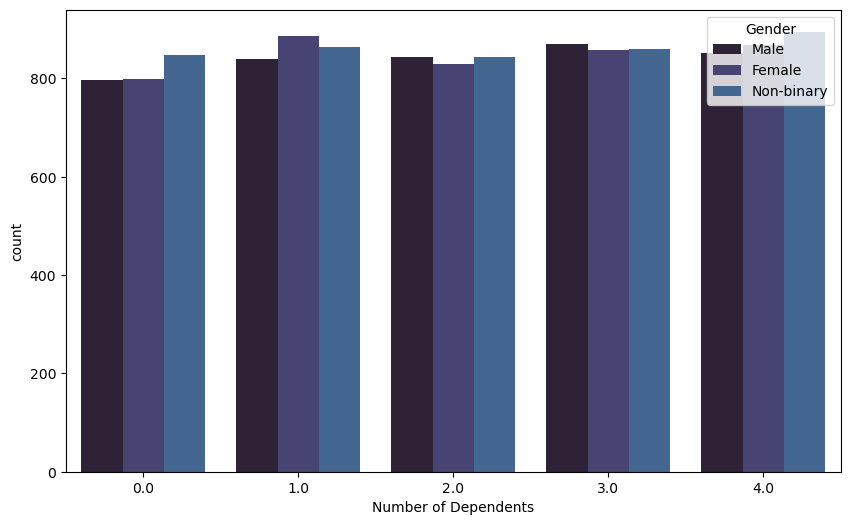

In [38]:
# Number of Dependents to Gender relation

plt.figure(figsize= (10, 6))
sns.countplot(df, x= df['Number of Dependents'].round(1), hue= 'Gender')

<Axes: xlabel='Employment Status', ylabel='Income'>

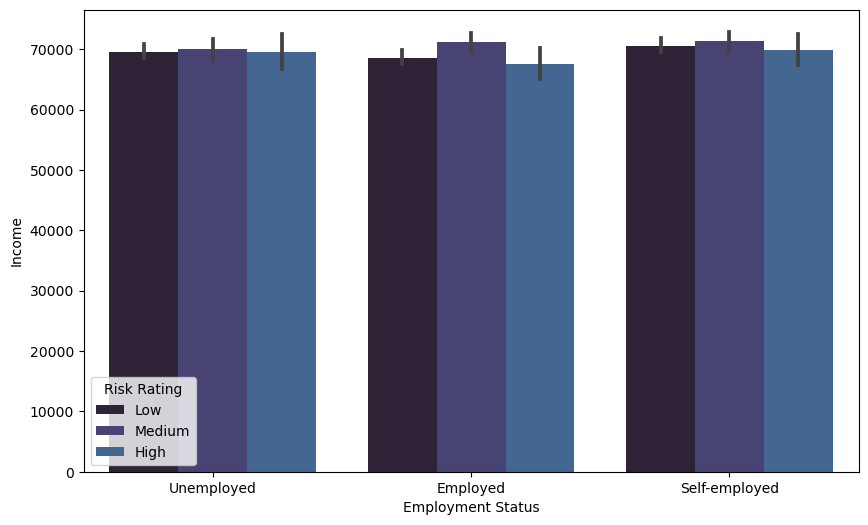

In [39]:
# Employment Status to Income relation categorized by Risk Rating

plt.figure(figsize= (10,6))
sns.barplot(df, x= 'Employment Status', y= 'Income', hue= 'Risk Rating')

<Axes: xlabel='Marital Status', ylabel='Income'>

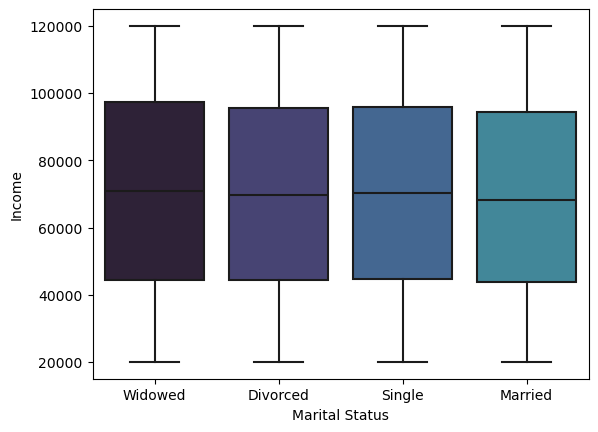

In [40]:
# Marital Status to Income relation

sns.boxplot(df, x='Marital Status', y='Income', order=df['Marital Status'].value_counts().index)

Those were only a few insights as examples of what can be done. We could visualize whatever the client, manager, stakeholder etc. wants. 

Now let's spice things up a little bit and implement some Machine Learning to predict Risk Rating:

### Predictive data analysis

In [41]:
# We import our ML tools

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [42]:
# Defining our X and y

X = df.drop('Risk Rating', axis=1)
y = df['Risk Rating']

In [43]:
# We separate numeric features from categorical features

num_features = ['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job', 
                     'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults', 'Marital Status Change']
cat_features = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status', 
                         'Payment History', 'City', 'State', 'Country']

Below is the step we mentioned before, in which we take care of the missing values in the context of a machine learning purpose:
 
We use sklearn's SimpleImputer for both, numeric and categorical features. It essentially does the same as we would manually do. It fills the missing values with mean, median or most frequent occurrence. Although we only have numeric missing values, we'll still use the SimpleImputer on the categorical values as well (just for the sake of developing good habits). We'll use the 'median' option for the numeric values and the 'most frequent' option for the categorical values. 

StandardScaler removes the mean and 'flattens' the variance (spread) of the data.

OneHotEncoder just assigns a numeric value to each of the unique categories present in the categorical features (e.g. if there's three gender categories, Male, Female and Non-Binary, it will encode those as 0, 1 and 2 respectively)

In [44]:
# We preprocess and transform the data with Pipeline. 

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)])

In [45]:
# We split our data into training set and test set and fit our model (RandomForest) with Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'Credit Score',
                                                   'Loan Amount',
                                                   'Years at Current Job',
                                                   'Debt-to-Income Ratio',
                                                   'Assets Value',
                                                   'Number of Dependents',
                                                   'Previous Defaults',
                                                   'Marital Status Change']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education Level',
                                                   'Marital Status',
                                                   'Loan Purpose',
                                                   'Employment Status',
                                                   'Payment History', 'City',
                                                   'State', 'Country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Model Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       326
         Low       0.59      1.00      0.74      1779
      Medium       0.40      0.00      0.00       895

    accuracy                           0.59      3000
   macro avg       0.33      0.33      0.25      3000
weighted avg       0.47      0.59      0.44      3000



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


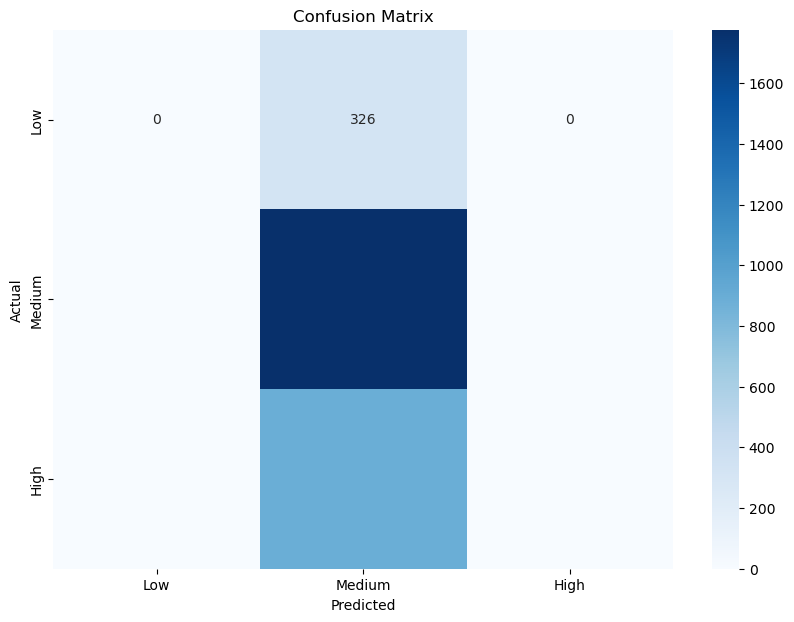

In [46]:
# Prediction of 'y' by our RandomForest model

y_pred = model.predict(X_test)

# Accuracy score

acc = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {acc.round(2)}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Thanks for looking! Feedback would be much appreciated! 

### Best regards,

Marty